In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [ ]:
import zipfile
import os
# Path to the uploaded ZIP file
zip_path = "/content/archive (1).zip"

# Path to extract the dataset
extract_path = "/content/AugmentedAlzheimerDataset"



# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to: {extract_path}")

Extracted to: /content/AugmentedAlzheimerDataset


In [ ]:
import os
import pandas as pd

# Set the paths to the extracted dataset
MildDemented_dir = r'/content/AugmentedAlzheimerDataset/AugmentedAlzheimerDataset/MildDemented'
ModerateDemented_dir = r'/content/AugmentedAlzheimerDataset/AugmentedAlzheimerDataset/ModerateDemented'
NonDemented_dir = r'/content/AugmentedAlzheimerDataset/AugmentedAlzheimerDataset/NonDemented'
VeryMildDemented_dir = r'/content/AugmentedAlzheimerDataset/AugmentedAlzheimerDataset/VeryMildDemented'


#Now assigning paths to each image
filepaths=[]
labels=[]
dict_list=[MildDemented_dir , ModerateDemented_dir , NonDemented_dir , VeryMildDemented_dir]
class_labels=['mild demented' , 'moderate demented' , 'non demented' , 'very mild demented']

for i, j in enumerate(dict_list):
  flist=os.listdir(j)
  for f in flist:
    fpath=os.path.join(j,f)
    filepaths.append(fpath)
    labels.append(class_labels[i])


#now concatenate both filepath of each image and their labels
Fseries=pd.Series(filepaths,name='filepaths')
Lseries=pd.Series(labels,name='labels')
Alzheimer_data=pd.concat([Fseries,Lseries],axis=1)
Alzheimer_df=pd.DataFrame(Alzheimer_data)#

#display first few rows
print(Alzheimer_df.head())



                                           filepaths         labels
0  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
1  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
2  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
3  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
4  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented


In [ ]:
Alzheimer_df.shape

(33984, 2)

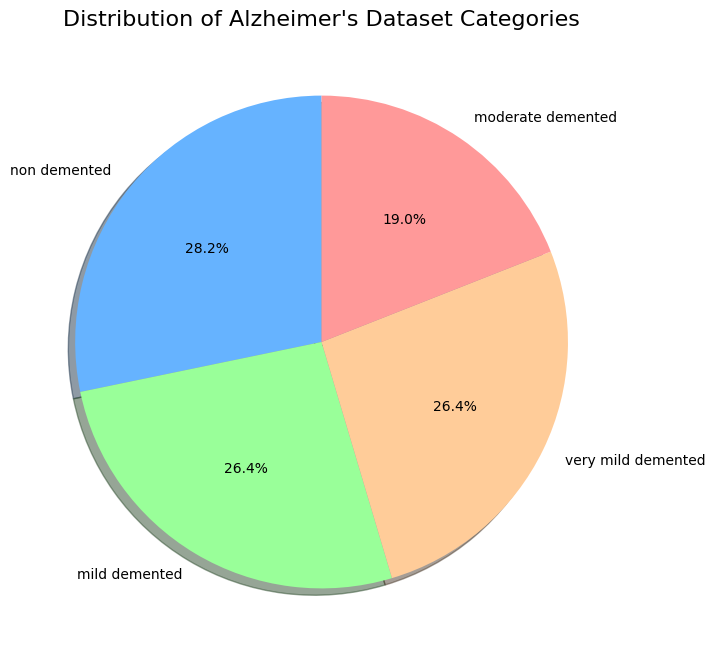

In [ ]:
import matplotlib.pyplot as plt

# Count the number of images in each category
label_counts = Alzheimer_df['labels'].value_counts()

# Define labels and sizes for the pie chart
labels = label_counts.index.tolist()  # Get the category names
sizes = label_counts.values.tolist()  # Get the count of images in each category

# Define colors for the pie chart
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

# Add a title
plt.title('Distribution of Alzheimer\'s Dataset Categories', fontsize=16)

# Display the pie chart
plt.show()

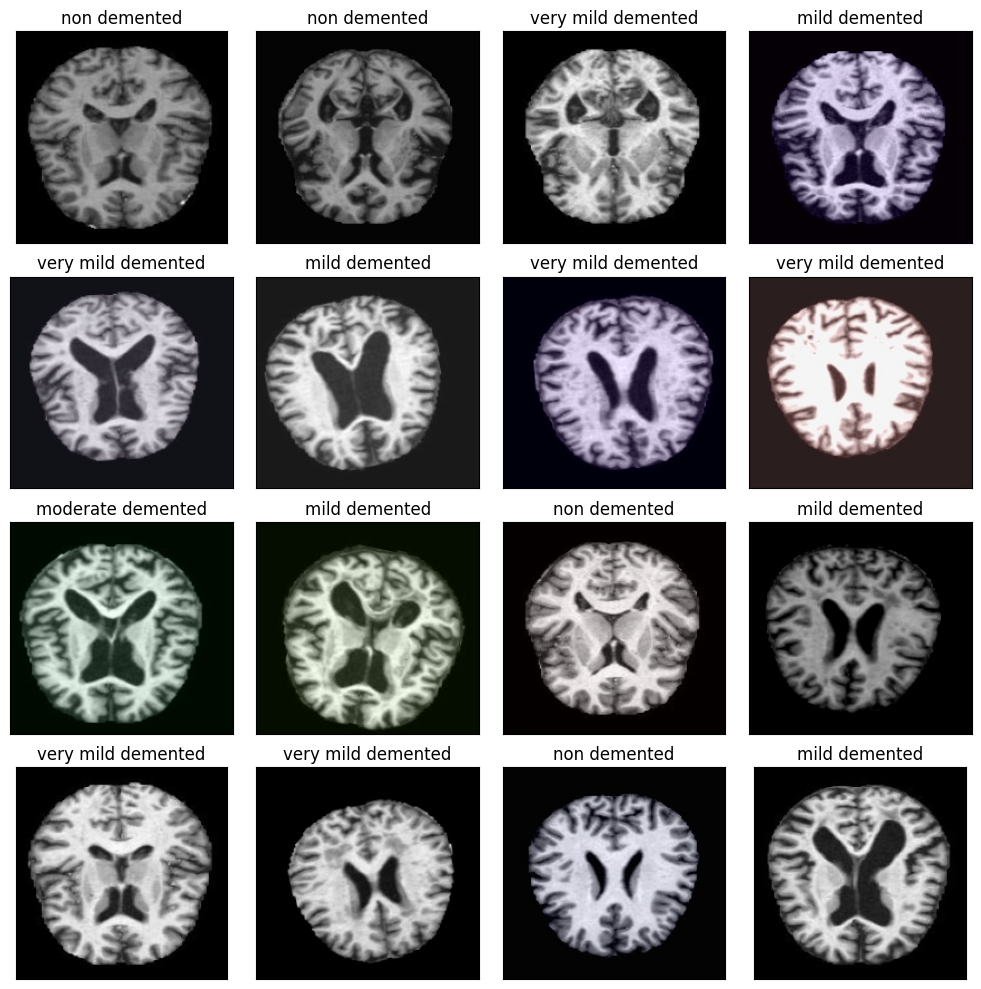

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#display 16 pictures of data
random_index=np.random.randint(0,len(Alzheimer_df),16)
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(10,10),
                      subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
  ax.imshow(plt.imread(Alzheimer_df.filepaths[random_index[i]]))
  ax.set_title(Alzheimer_df.labels[random_index[i]])
plt.tight_layout()
plt.show()

In [ ]:
image_sizes = []

# Loop through all 33984 images and store their shape
for img_path in Alzheimer_df.filepaths[:33984]:
    img = plt.imread(img_path)
    image_sizes.append(img.shape[:2])  # Save (height, width)

# Convert to NumPy array
image_sizes = np.array(image_sizes)

# Get unique image shapes
unique_shapes = np.unique(image_sizes, axis=0)
print(f"Unique Image Shapes in Dataset: {unique_shapes}")


Unique Image Shapes in Dataset: [[180 180]
 [190 200]]


In [ ]:
# Check the first few rows of the dataset
print(Alzheimer_df.head())

# Get dataset information (column names, non-null values, data types)
print(Alzheimer_df.info())

# Check for missing values
print("\nMissing Values:\n", Alzheimer_df.isnull().sum())

# Get dataset summary (numerical stats if applicable)
print("\nDataset Summary:\n", Alzheimer_df.describe())


                                           filepaths         labels
0  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
1  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
2  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
3  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
4  /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33984 entries, 0 to 33983
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  33984 non-null  object
 1   labels     33984 non-null  object
dtypes: object(2)
memory usage: 531.1+ KB
None

Missing Values:
 filepaths    0
labels       0
dtype: int64

Dataset Summary:
                                                 filepaths        labels
count                                               33984         33984
unique                                              33984

In [ ]:
# Check for duplicate file paths
duplicates = Alzheimer_df['filepaths'].duplicated().sum()
print(f"Number of Duplicate Images: {duplicates}")


Number of Duplicate Images: 0


In [ ]:
#display count of images in each category
print(Alzheimer_df['labels'].value_counts())


labels
non demented          9600
mild demented         8960
very mild demented    8960
moderate demented     6464
Name: count, dtype: int64


In [ ]:
pip install split-folders

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train (70%) and test (30%)
train_images, test_images = train_test_split(Alzheimer_df, test_size=0.3, random_state=42)

# Step 2: Split the training set further into train (80%) and validation (20%)
train_set, val_set = train_test_split(train_images, test_size=0.2, random_state=42)

print(f"Train set: {len(train_set)} images")
print(f"Validation set: {len(val_set)} images")
print(f"Test set: {len(test_images)} images")


Train set: 19030 images
Validation set: 4758 images
Test set: 10196 images


In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(19030, 2)
(10196, 2)
(4758, 2)
(23788, 2)


In [ ]:
print(train_set.head())  # Display first 5 rows of the training dataset
print(test_images.head())   # Display first 5 rows of the test dataset
print(val_set.head())    # Display first 5 rows of the validation dataset


                                               filepaths         labels
2544   /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
924    /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
6586   /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
16720  /content/AugmentedAlzheimerDataset/AugmentedAl...   non demented
2211   /content/AugmentedAlzheimerDataset/AugmentedAl...  mild demented
                                               filepaths             labels
16224  /content/AugmentedAlzheimerDataset/AugmentedAl...       non demented
1188   /content/AugmentedAlzheimerDataset/AugmentedAl...      mild demented
21512  /content/AugmentedAlzheimerDataset/AugmentedAl...       non demented
2111   /content/AugmentedAlzheimerDataset/AugmentedAl...      mild demented
12968  /content/AugmentedAlzheimerDataset/AugmentedAl...  moderate demented
                                               filepaths              labels
32755  /content/AugmentedAlzheimerD

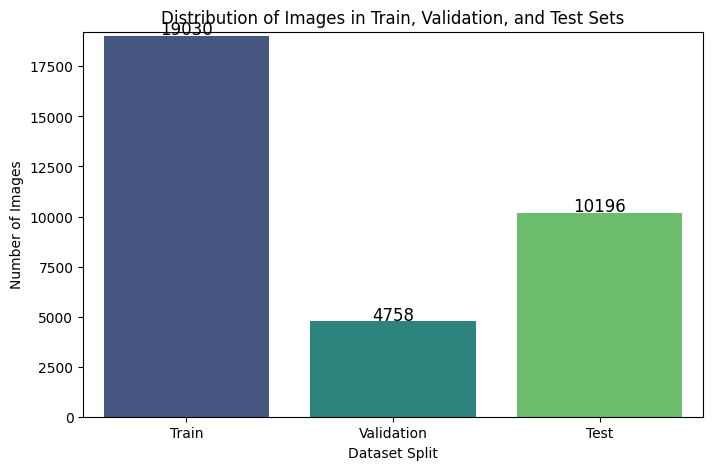

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset sizes
train_size = len(train_set)
val_size = len(val_set)
test_size = len(test_images)

# Labels and values
labels = ['Train', 'Validation', 'Test']
values = [train_size, val_size, test_size]

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=values, palette='viridis')

# Add value annotations
for i, v in enumerate(values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)

plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.title("Distribution of Images in Train, Validation, and Test Sets")
plt.ylim(0, max(values) + 200)
plt.show()


labels
non demented          9600
mild demented         8960
very mild demented    8960
moderate demented     6464
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Define ImageDataGenerator with resizing
image_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input  # Normalize pixels
)

# Resize images dynamically within the generator without modifying original dataset
target_size = (224, 224)  # Set a consistent resolution

train = image_gen.flow_from_dataframe(
    dataframe=train_set,
    x_col="filepaths",
    y_col="labels",
    target_size=target_size,  # Resize images
    color_mode='rgb',
    class_mode="categorical",  # Suitable for classification
    batch_size=32,
    shuffle=True  # Enable shuffle for better training
)

test = image_gen.flow_from_dataframe(
    dataframe=test_images,
    x_col="filepaths",
    y_col="labels",
    target_size=target_size,  # Resize images
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False  # No shuffle to maintain order for evaluation
)

val = image_gen.flow_from_dataframe(
    dataframe=val_set,
    x_col="filepaths",
    y_col="labels",
    target_size=target_size,  # Resize images
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=True
)

print("✅ Dataset split successfully with resized images!")


Found 19030 validated image filenames belonging to 4 classes.
Found 10196 validated image filenames belonging to 4 classes.
Found 4758 validated image filenames belonging to 4 classes.
✅ Dataset split successfully with resized images!


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 73, 73, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 73, 73, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 512)         │           2,0

 Total params: 15,611,526 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

 Optimizer params: 2 (12.00 B)

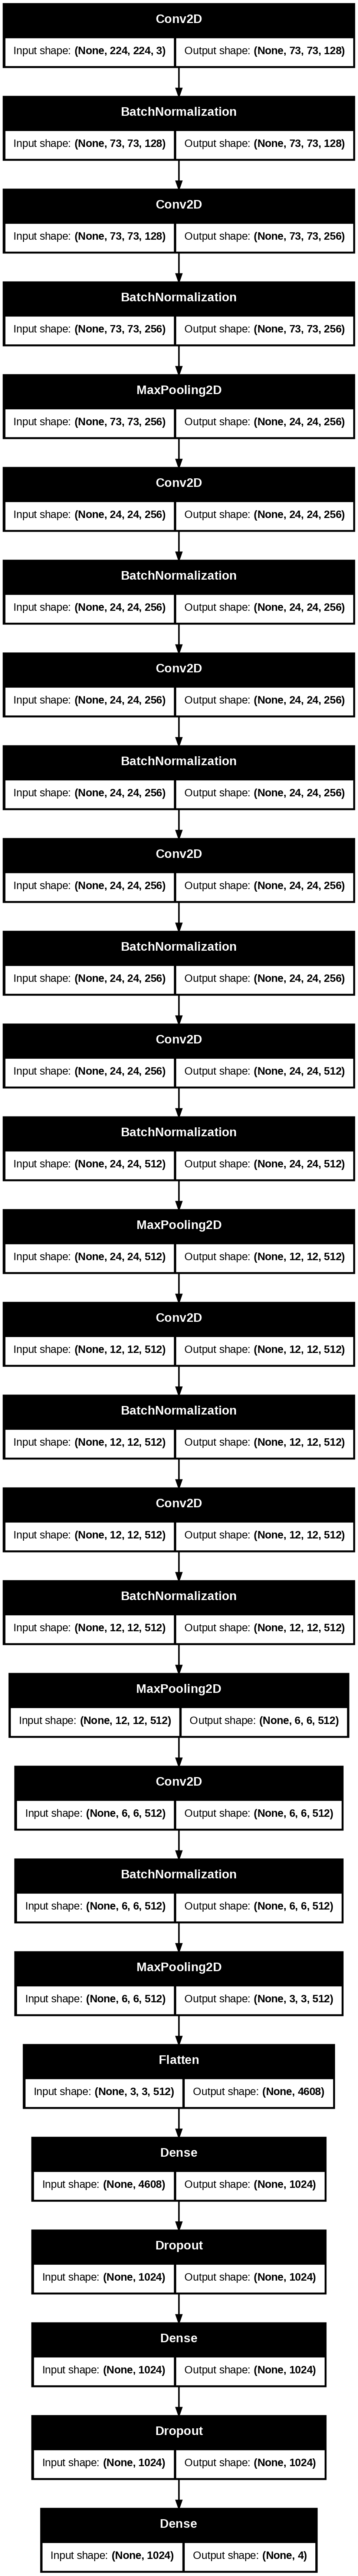

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=150)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:




# Pass class weights to the fit method
history = model.fit(
    train,
    epochs=20,
    validation_data=val,
    validation_freq=1
)

Epoch 1/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 138s 195ms/step - accuracy: 0.3310 - loss: 1.8228 - val_accuracy: 0.4807 - val_loss: 1.1351
Epoch 2/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 91s 152ms/step - accuracy: 0.4869 - loss: 1.1334 - val_accuracy: 0.5904 - val_loss: 0.9351
Epoch 3/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 92s 155ms/step - accuracy: 0.5639 - loss: 0.9579 - val_accuracy: 0.6330 - val_loss: 0.8203
Epoch 4/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 92s 155ms/step - accuracy: 0.5950 - loss: 0.8705 - val_accuracy: 0.6393 - val_loss: 0.7818
Epoch 5/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 92s 155ms/step - accuracy: 0.6332 - loss: 0.7972 - val_accuracy: 0.6759 - val_loss: 0.7154
Epoch 6/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 93s 157ms/step - accuracy: 0.6550 - loss: 0.7407 - val_accuracy: 0.6898 - val_loss: 0.6879
Epoch 7/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 94s 157ms/step - accuracy: 0.6951 - loss: 0.6711 - val_accuracy: 0.6978 - val_loss: 0.6502
Epoch 8/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 91s 153ms/step - accuracy: 0.7262 - loss: 

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

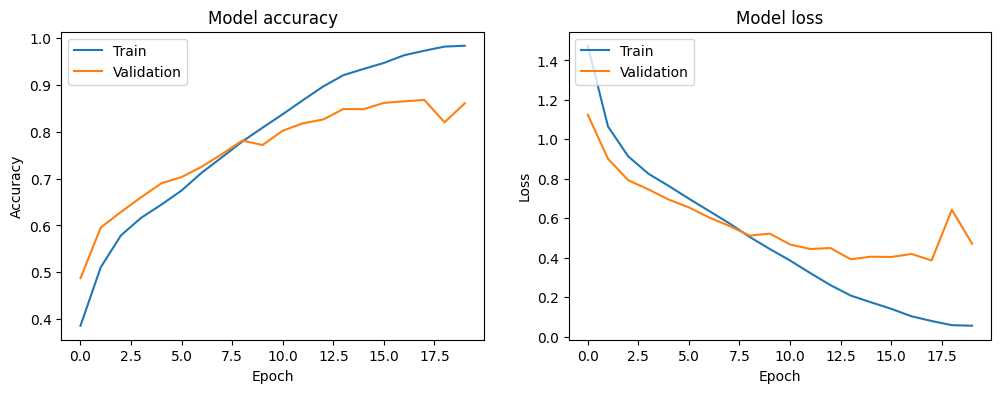

In [ ]:
plot_loss_curves(history)

In [ ]:
valid_loss, valid_accuracy = model.evaluate(val)

print(f'\nTrain loss: {valid_loss:.2f}')
print(f'Train Accuracy: {valid_accuracy*100:.2f} %')

149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.8703 - loss: 0.4144

Train loss: 0.42
Train Accuracy: 87.07 %


In [ ]:
loss, accuracy =model.evaluate(test)

print(f'\nTest loss: {loss:.2f} ')
print(f'Test Accuracy: {accuracy*100:.2f} %')

319/319 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.8626 - loss: 0.4176

Test loss: 0.42 
Test Accuracy: 86.32 %


In [ ]:
from sklearn.metrics import accuracy_score
# Get predictions on the test set
test_predictions = model.predict(test, verbose=1)

# Convert the predicted probabilities to class labels
predicted_class_labels = np.argmax(test_predictions, axis=1)

# Get the actual labels from the test set
true_class_labels = test.classes  # .classes contains the true class labels

# Calculate the accuracy using sklearn's accuracy_score
accuracy = accuracy_score(true_class_labels, predicted_class_labels)

# Print the accuracy
print(f"Prediction Accuracy on Test Set: {accuracy * 100:.2f}%")

319/319 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step
Prediction Accuracy on Test Set: 85.27%


319/319 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2693
           1       0.98      0.99      0.99      1977
           2       0.86      0.84      0.85      2811
           3       0.86      0.70      0.77      2715

    accuracy                           0.86     10196
   macro avg       0.87      0.87      0.87     10196
weighted avg       0.87      0.86      0.86     10196

Accuracy of the Model: 86.3%


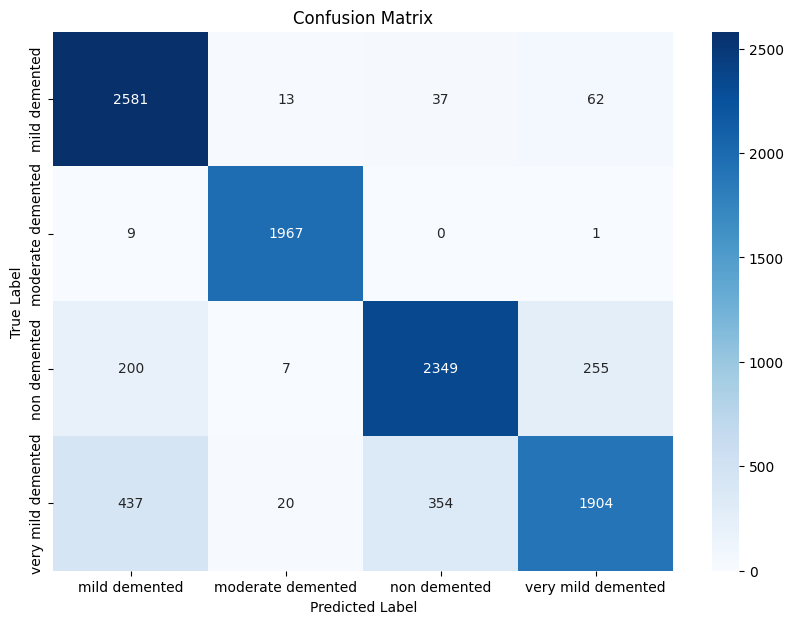

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
test_predictions = model.predict(test, verbose=1)

# Convert predicted probabilities to class labels
predicted_class_labels = np.argmax(test_predictions, axis=1)

# Get the actual labels from the test set
y_test = test.classes  # .classes contains the true class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_class_labels)

# Print classification report
print(classification_report(y_test, predicted_class_labels))

# Print accuracy of the model
accuracy = accuracy_score(y_test, predicted_class_labels)
print(f"Accuracy of the Model: {accuracy * 100:.1f}%")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import joblib

# Save the preprocessing function (used in ImageDataGenerator)
preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
joblib.dump(preprocessing_function, 'preprocessing_function.pkl')

# Save the trained model
model.save('alzheimer_model.keras')

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Define the path where the model will be saved
model_save_path = '/content/drive/My Drive/models5/'

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

# Now define the file path to save the model
model_save_file = os.path.join(model_save_path, 'model_name.keras')

# Save the model in the Keras format
model.save(model_save_file)

print(f"Model saved at {model_save_file}")


Model saved at /content/drive/My Drive/models5/model_name.keras


In [ ]:
# Define the path where the model is saved
model_save_path = '/content/drive/My Drive/models4/model_name.keras'

# Load the model
loaded_model = tf.keras.models.load_model(model_save_path)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import joblib

# Load the saved preprocessing function
# Ensure the preprocessing function is saved correctly during training
preprocessing_function = joblib.load('preprocessing_function.pkl')

# Load the saved model
model = keras.models.load_model('alzheimer_model.keras')

# Define class labels (modify based on your dataset)
class_labels = ["Mild Dementia", "Moderate Dementia", "Non Dementia", "Very Mild Dementia"]

# Function to preprocess the uploaded image
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocesses the image to match the model's input requirements.
    - Resizes the image to the target size.
    - Applies the same preprocessing as during training.
    - Adds a batch dimension.
    """
    # Load the image
    img = Image.open(image_path)

    # Convert to RGB if the image is grayscale
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize the image to match the model's input shape
    img = img.resize(target_size)

    # Convert to numpy array
    img_array = np.array(img)

    # Apply the same preprocessing as during training
    img_array = preprocessing_function(img_array)

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Function to predict the category of the image
def predict_image(image_path):
    """
    Predicts the disease stage for the given image.
    - Preprocesses the image.
    - Makes a prediction using the model.
    - Returns the predicted class and confidence score.
    """
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Get the confidence score
    confidence = np.max(predictions)

    return predicted_class_label, confidence

# Upload and predict
image_path = input("Enter the path to the MRI scan: ")  # Example: "test_mri.jpg"
predicted_class, confidence = predict_image(image_path)

# Display the result
print(f"Predicted Disease Stage: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

Enter the path to the MRI scan: /content/AugmentedAlzheimerDataset/OriginalDataset/ModerateDemented/30 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
Predicted Disease Stage: Moderate Dementia
Confidence: 1.00


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=341296cdeeccea1e698338e97b6fe1fbda13505579cabe4ecec1384b27f54cb7
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
pip install scikit-image

Enter the path to the MRI scan: /content/AugmentedAlzheimerDataset/OriginalDataset/VeryMildDemented/verymildDem1489.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
Predicted Disease Stage: Very Mild Dementia
Confidence: 0.99


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━

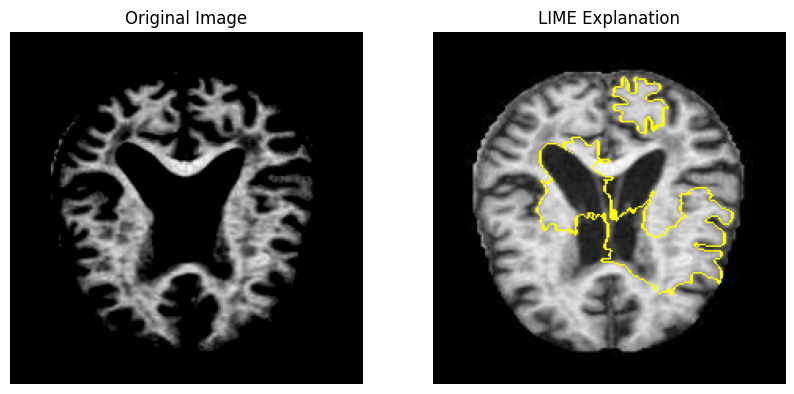

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import joblib
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Load the saved preprocessing function
# Ensure the preprocessing function is saved correctly during training
preprocessing_function = joblib.load('preprocessing_function.pkl')

# Load the saved model
model = keras.models.load_model('alzheimer_model.keras')

# Define class labels (modify based on your dataset)
class_labels = ["Mild Dementia", "Moderate Dementia", "Non Dementia", "Very Mild Dementia"]

# Function to preprocess the uploaded image
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocesses the image to match the model's input requirements.
    - Resizes the image to the target size.
    - Applies the same preprocessing as during training.
    - Adds a batch dimension.
    """
    # Load the image
    img = Image.open(image_path)

    # Convert to RGB if the image is grayscale
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize the image to match the model's input shape
    img = img.resize(target_size)

    # Convert to numpy array
    img_array = np.array(img)

    # Apply the same preprocessing as during training
    img_array = preprocessing_function(img_array)

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Function to predict the category of the image
def predict_image(image_path):
    """
    Predicts the disease stage for the given image.
    - Preprocesses the image.
    - Makes a prediction using the model.
    - Returns the predicted class and confidence score.
    """
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Get the confidence score
    confidence = np.max(predictions)

    return predicted_class_label, confidence, img_array[0]  # Return the preprocessed image for LIME

# Function to explain the prediction using LIME
def explain_with_lime(image, model, class_labels, top_labels=5, num_samples=1000):
    """
    Explains the model's prediction using LIME.
    - Generates a LIME explanation for the image.
    - Visualizes the explanation.
    """
    # Create a LIME explainer
    explainer = lime_image.LimeImageExplainer()

    # Explain the model's prediction
    explanation = explainer.explain_instance(
        image,
        model.predict,
        top_labels=top_labels,
        hide_color=0,
        num_samples=num_samples
    )

    # Get the explanation for the top predicted class
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=5,
        hide_rest=False
    )

    # Display the original image and the explanation
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    # LIME Explanation
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title("LIME Explanation")
    plt.axis('off')

    plt.show()

# Upload and predict
image_path = input("Enter the path to the MRI scan: ")  # Example: "test_mri.jpg"
predicted_class, confidence, preprocessed_image = predict_image(image_path)

# Display the result
print(f"Predicted Disease Stage: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

# Explain the prediction using LIME
explain_with_lime(preprocessed_image, model, class_labels)